# Deep Learning - Optimasi Akurasi Metode Convolutional Neural Network untuk Identifikasi Jenis Sampah
- I Komang Cleon Kalea
- 2105551090
- Deep Learning (B)

## Import Library

In [2]:
import os
import random
import shutil
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
import sys
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sys.setrecursionlimit(10000)


## Function

### Function: Plot Confusion Matrix

In [3]:
def plot_cm(model, test_generators):

    predictions = model.predict(test_generators)
    true_labels = test_generators.classes

    predicted_labels = (predictions > 0.5).astype('int32')

    cm = confusion_matrix(true_labels, predicted_labels)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generators.class_indices)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()


### Function: Plot Training History

In [4]:
def plot_training(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


## Data Preprocessing

In [5]:
root_path = ''
source_path = os.path.join(root_path, 'raw dataset')
data_source_path = os.path.join(source_path, 'organic-nonorganic')
clean_dataset = True
SPLIT_SIZE = 0.8

### Create New Dataset

In [6]:
def create_train_val_dir(root_path):
    training_paths = {}
    validation_paths = {}

    datasets_dir = os.path.join(root_path, 'dataset')
    organic_nonorganic_dir = os.path.join(datasets_dir, 'organic-nonorganic')

    if clean_dataset==True and os.path.exists(organic_nonorganic_dir)==True :
        shutil.rmtree(organic_nonorganic_dir)

    training_dir = os.path.join(organic_nonorganic_dir, 'training')
    validation_dir = os.path.join(organic_nonorganic_dir, 'validation')

    organik_training_dir = os.path.join(training_dir, 'organik')
    organik_validation_dir = os.path.join(validation_dir, 'organik')

    nonorganik_training_dir = os.path.join(training_dir, 'non_organik')
    nonorganik_validation_dir = os.path.join(validation_dir, 'non_organik')

    training_paths['training_organik_dir'] = organik_training_dir
    training_paths['training_non_organik_dir'] = nonorganik_training_dir
    validation_paths['validation_organik_dir'] = organik_validation_dir
    validation_paths['validation_non_organik_dir'] = nonorganik_validation_dir

    if clean_dataset == False:
        print("Directory already exist! using existing directory! SET 'clean_dataset=True' to remake the directories.")
        pass
    else:
        os.makedirs(organik_training_dir)
        os.makedirs(organik_validation_dir)
        os.makedirs(nonorganik_training_dir)
        os.makedirs(nonorganik_validation_dir)

    return training_dir, validation_dir, training_paths, validation_paths


In [7]:
training_dir, validation_dir, training_paths, validation_paths = create_train_val_dir(root_path=root_path)


### Data Preprocessing: Data Cleaning & Data Splitting

In [8]:
def copy_split_shuffle_data(data_source_path, training_paths, validation_paths, split_size):
    files = []
    pathsep = "\\"
    data_ = {}

    try:
        for path, dirs, files in os.walk(data_source_path):
            for file in files:
                sep_file = os.path.join(path, file)

                if os.path.getsize(sep_file) > 0:
                    key = path.split(pathsep)[len(path.split(pathsep))-1].lower().replace(' ', '_') + "_train_dir".lower()
                    if key in data_:
                        data_[key].append(sep_file)
                    else:
                        data_[key] = [sep_file]
                else:
                    print(f"File has no weight: {file}. IGNORING!")
    except Exception as e:
        print(f"An error occurred: {e}")

    data = {
        'organik_train_dir': data_['organik_train_dir'],
        'non_organik_train_dir': data_['non_organik_train_dir']
    }

    try:
        for files_list, train_path, val_path in zip (data.values(), training_paths.values(), validation_paths.values()):
            print(files_list)
            print(train_path)
            print(val_path)

            if train_path is not None and val_path is not None:
                random.shuffle(files_list)

                split_point = int(len(files_list) * split_size)

                train_files = files_list[:split_point]
                val_files = files_list[split_point:]

                for file in train_files:
                    filename = os.path.basename(file)
                    dest_file = os.path.join(train_path, filename)
                    shutil.copyfile(file, dest_file)
                    print(f"Filename: {filename} copied from {file} to {dest_file} (Train)")

                for file in val_files:
                    filename = os.path.basename(file)
                    dest_file = os.path.join(val_path, filename)
                    shutil.copyfile(file, dest_file)
                    print(f"Filename: {filename} copied from {file} to {dest_file} (Validation)")

            else:
                print(f"No destination path found for class: . Skipping copying.")

    except Exception as e:
        print(f"An error occurred during file copying: {e}")


In [11]:
if clean_dataset== True:
    copy_split_shuffle_data(data_source_path, training_paths, validation_paths, SPLIT_SIZE)


['raw dataset\\organic-nonorganic\\organik\\cardboard1.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard10.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard100.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard101.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard102.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard103.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard104.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard105.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard106.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard107.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard108.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard109.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard11.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard110.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard111.jpg', 'raw dataset\\organic-nonorganic\\organik\\cardboard112.jpg', 'raw datase

### Data Preprocessing: Data Augmentation

In [12]:
test_dir = 'dataset/organic-nonorganic-test'

def train_val_generator(train_dir, val_dir, test_dir):

    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    vertical_flip=True,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    train_generators = train_datagen.flow_from_directory(
                            directory=train_dir,
                            target_size=(150,150),
                            batch_size=64,
                            class_mode='binary',
                        )

    val_generators = val_datagen.flow_from_directory(
                            directory=val_dir,
                            batch_size=32,
                            class_mode='binary',
                            target_size=(150, 150)
                        )
    
    test_generators = test_datagen.flow_from_directory(
                            directory=test_dir,
                            class_mode='binary',
                            target_size=(150, 150),
                            shuffle=False
    )
    

    return train_generators, val_generators, test_generators

In [13]:
train_generators, val_generators, test_generators = train_val_generator(training_dir, validation_dir, test_dir)

Found 1344 images belonging to 2 classes.
Found 336 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


## Model

### Model: Architecture before Hyperparameter Tuning

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model = create_model()

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │         1,539 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,151 (13.18 MB)

 Trainable params: 3,454,151 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generators, epochs=20, verbose=1, validation_data=val_generators, steps_per_epoch=25)

c:\Users\Kalea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/25 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.5465 - loss: 0.7384

c:\Users\Kalea\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.5517 - loss: 0.7305 - val_accuracy: 0.6458 - val_loss: 0.5948
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - accuracy: 0.6460 - loss: 0.6215 - val_accuracy: 0.7262 - val_loss: 0.6350
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.6820 - loss: 0.6130 - val_accuracy: 0.7083 - val_loss: 0.5585
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.6908 - loss: 0.5878 - val_accuracy: 0.7054 - val_loss: 0.5598
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.7034 - loss: 0.5388 - val_accuracy: 0.7262 - val_loss: 0.5562
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.7002 - loss: 0.5448 - val_accuracy: 0.7262 - val_loss: 0.5263
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.7050 - loss: 0.5433 - val_accuracy: 0.7381 - val_loss: 0.5073
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.7055 - loss: 0.5217 - val_accuracy: 0.6935 - val_

#### Model: Before Hyperparameter Tuning Architecture Evaluation

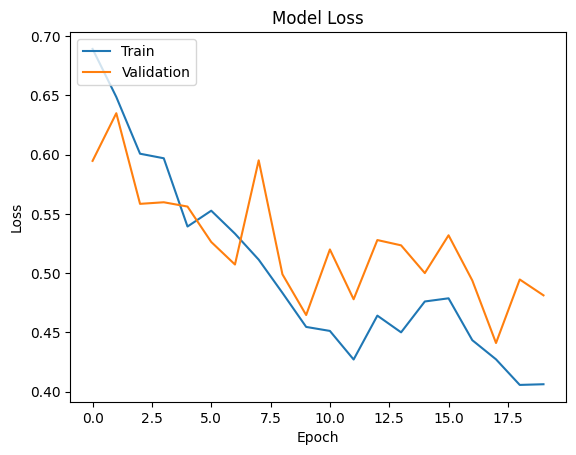

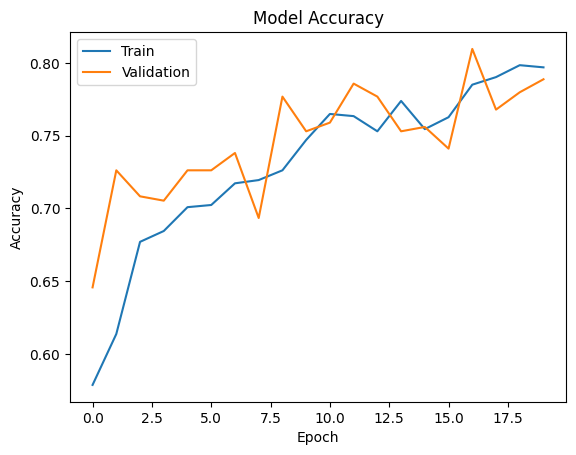

In [45]:
plot_training(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step 


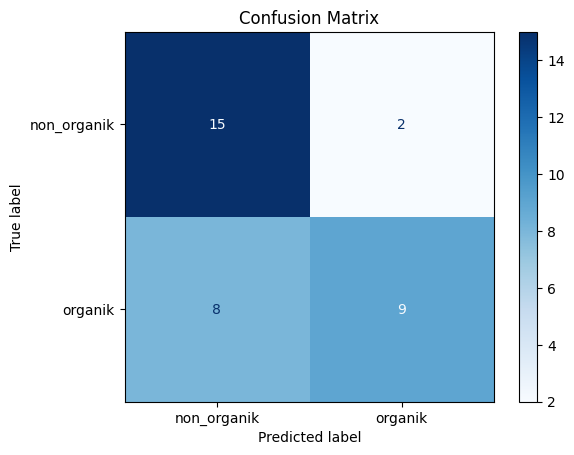

In [46]:
plot_cm(model=model, test_generators=test_generators)

### Model: Architecture after Hyperparameter Tuning

In [14]:
def create_model_hyperparameter():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=(2, 2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(64, (3, 3),),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])


    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [15]:
model_hyperparameter = create_model_hyperparameter()
model_hyperparameter.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 75, 75, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 35, 35, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 766,657 (2.92 MB)

 Trainable params: 766,657 (2.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_hyperparameter = model_hyperparameter.fit(train_generators, epochs=20, verbose=1, validation_data=val_generators, steps_per_epoch=25)

c:\Users\Kalea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/25 ━━━━━━━━━━━━━━━━━━━━ 1s 484ms/step - accuracy: 0.5293 - loss: 0.7243

c:\Users\Kalea\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 490ms/step - accuracy: 0.5306 - loss: 0.7215 - val_accuracy: 0.5000 - val_loss: 0.6990
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.5000 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.4917 - loss: 0.6909 - val_accuracy: 0.6458 - val_loss: 0.6873
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.5810 - loss: 0.6817 - val_accuracy: 0.5030 - val_loss: 0.6908
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.5047 - loss: 0.6899 - val_accuracy: 0.5000 - val_loss: 0.6993
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.5830 - loss: 0.6595 - val_accuracy: 0.6131 - val_loss: 0.7278
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.6013 - loss: 0.6499 - val_accuracy: 0.6101 - val_loss: 0.6281
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.6410 - loss: 0.6024 - val_accuracy: 0.6756 - val

#### Model: Architecture after Hyperparameter Tuning Evaluation

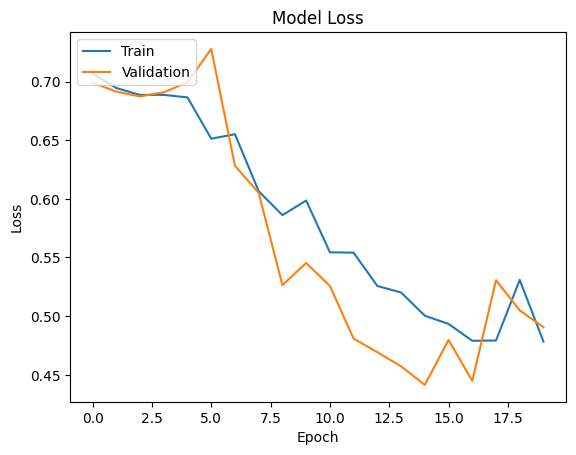

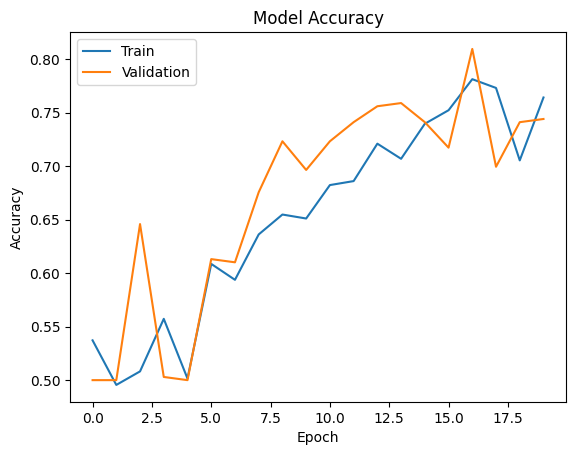

In [17]:
plot_training(history_hyperparameter)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


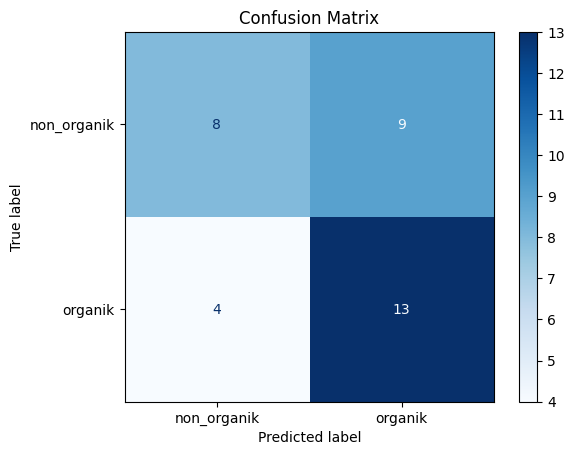

In [19]:
plot_cm(model=model_hyperparameter, test_generators=test_generators)